In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 📂Import Result EffNetB5 Paper

In [2]:
df_paper = pd.read_csv("/home/kannika/code/Result_EffNetB5_paper_test_on_newtestset.csv")
print(df_paper.shape)
df_paper.head()

(1312, 30)


,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Path Full,Path Crop,Views,fold,...,Sub_class_New,tag_AjNit,tag_AjWan,Test150,Spilt,Sub_Position_New,filename,Sub_Position_Label,category,Prob
0,0,111,40,P1,P1,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,...,AB01,NaN,NaN,False,Test,P1,AB01 P1 C040.JPG,P1,Normal,0.958335
1,1,112,40,P2,P2,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,...,AB01,NaN,NaN,False,Test,P2,AB01 P2 C040.JPG,P2,AB01,0.999923
2,2,113,40,P4,P41,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,...,AB01,NaN,NaN,False,Test,P4,AB01 P4-1 C040.JPG,P4,AB02,0.932391
3,3,114,40,P5,P51,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,2,...,AB01,NaN,NaN,False,Test,P6,AB01 P5-1 C040.JPG,P6,AB01,0.758282
4,4,115,40,P3,P31,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,...,AB01,NaN,NaN,False,Test,P3,AB01 P3-1 C040.JPG,P3,AB02,0.995624


Text(0.5, 21.5, 'Predicted label')

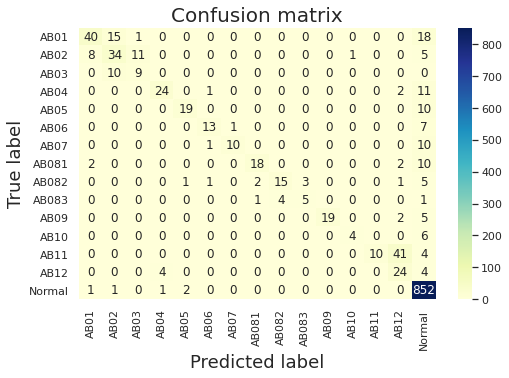

In [25]:
#create CF 
act = df_paper['Sub_class_New'].array
pred = df_paper['category'].array

data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## 📂Import Result EffNetB5 Unlearn - unfreezeB4-B7 (Block5a_se_excite-Block7 & FC)

In [3]:
df_unlearn = pd.read_csv("/home/kannika/code/Result_EffNetB5_unlearn_R2_UnfreezeB4-B7_USAI_unalanced.csv")
print(df_unlearn.shape)
df_unlearn.head()

(1312, 30)


,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Path Full,Path Crop,Views,fold,...,Sub_class_New,tag_AjNit,tag_AjWan,Test150,Spilt,Sub_Position_New,filename,Sub_Position_Label,category,Prob
0,0,111,40,P1,P1,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,...,AB01,NaN,NaN,False,Test,P1,AB01 P1 C040.JPG,P1,Normal,0.598785
1,1,112,40,P2,P2,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,...,AB01,NaN,NaN,False,Test,P2,AB01 P2 C040.JPG,P2,AB01,0.764712
2,2,113,40,P4,P41,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,...,AB01,NaN,NaN,False,Test,P4,AB01 P4-1 C040.JPG,P4,AB01,0.999968
3,3,114,40,P5,P51,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,2,...,AB01,NaN,NaN,False,Test,P6,AB01 P5-1 C040.JPG,P6,AB01,0.999844
4,4,115,40,P3,P31,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,...,AB01,NaN,NaN,False,Test,P3,AB01 P3-1 C040.JPG,P3,AB02,0.999443


In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = df_unlearn['Sub_class_New'].array
pred = df_unlearn['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 88.64329268292683%
              precision    recall  f1-score   support

        AB01       0.77      0.66      0.71        74
        AB02       0.66      0.56      0.61        59
        AB03       0.59      0.68      0.63        19
        AB04       0.92      0.61      0.73        38
        AB05       0.88      0.72      0.79        29
        AB06       0.85      0.52      0.65        21
        AB07       0.73      0.52      0.61        21
       AB081       0.91      0.62      0.74        32
       AB082       0.94      0.57      0.71        28
       AB083       0.69      0.82      0.75        11
        AB09       0.91      0.81      0.86        26
        AB10       0.73      0.80      0.76        10
        AB11       0.94      0.91      0.93        55
        AB12       0.96      0.84      0.90        32
      Normal       0.91      0.99      0.95       857

    accuracy                           0.89      1312
   macro avg       0.83      0.71      

Text(0.5, 21.5, 'Predicted label')

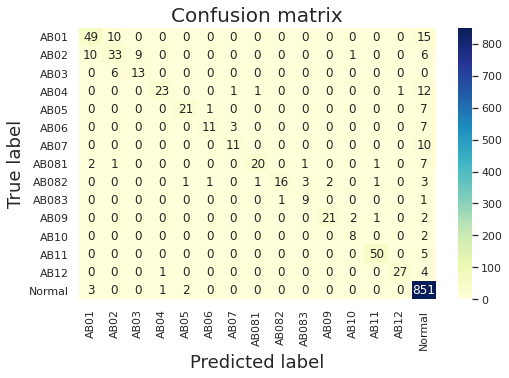

In [26]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

##  ⚙️💡Evaluation

In [6]:
#เช็คคลาสใน Predicted
pred_class_paper = set(df_paper['category'])
print(len(pred_class_paper))
print(pred_class_paper)

pred_class_unlearn = set(df_unlearn['category'])
print(len(pred_class_unlearn))
print(pred_class_paper)

15
{'AB03', 'AB12', 'AB06', 'AB09', 'AB11', 'Normal', 'AB04', 'AB082', 'AB05', 'AB02', 'AB01', 'AB083', 'AB081', 'AB07', 'AB10'}
15
{'AB03', 'AB12', 'AB06', 'AB09', 'AB11', 'Normal', 'AB04', 'AB082', 'AB05', 'AB02', 'AB01', 'AB083', 'AB081', 'AB07', 'AB10'}


In [11]:
pred_paper = df_paper['Sub_class_New'].array
print(len(pred_paper))

pred_unlearn = df_unlearn['category'].array
print(len(pred_unlearn))

act = df_paper['Sub_class_New'].array
print(len(act))

1312
1312
1312


In [15]:
batch_size = 32
height = width = 456

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = df_paper,
        directory = None,
        x_col = 'Path Crop',
        y_col = 'Sub_class_New',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 1312 validated image filenames belonging to 15 classes.
{0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}


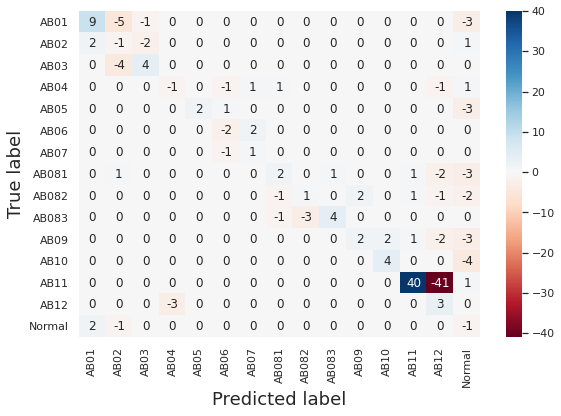

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example class labels (replace these with actual class names)
class_labels = ['AB01', 'AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082',
                    'AB083','AB09','AB10','AB11','AB12','Normal']

act = df_paper['Sub_class_New'].array
pred_paper = df_paper['category'].array
pred_unlearn = df_unlearn['category'].array

# Compute confusion matrices
cm_base = confusion_matrix(act, pred_paper)
cm_unlearn = confusion_matrix(act, pred_unlearn)

# Compute the difference matrix
cm_diff = cm_unlearn - cm_base

# Plot the confusion matrix difference
plt.figure(figsize=(9, 6))
sns.heatmap(cm_diff, annot=True, fmt="d", cmap="RdBu", center=0, xticklabels=class_labels, yticklabels=class_labels)

ax.set_facecolor('white') 
plt.xlabel("Predicted label", fontsize=18)
plt.ylabel("True label", fontsize=18)
#plt.title("Confusion Matrix Difference of EfficientNet Model (Unlearn - Original)", fontsize=16)
plt.show()

In [24]:
print(pd.crosstab(pd.Series(act, name="Actual"), pd.Series(pred_paper, name="Predicted Base")))
print(pd.crosstab(pd.Series(act, name="Actual"), pd.Series(pred_unlearn, name="Predicted Unlearn")))

Predicted Base  AB01  AB02  AB03  AB04  AB05  AB06  AB07  AB081  AB082  AB083  \
Actual                                                                          
AB01              74     0     0     0     0     0     0      0      0      0   
AB02               0    59     0     0     0     0     0      0      0      0   
AB03               0     0    19     0     0     0     0      0      0      0   
AB04               0     0     0    38     0     0     0      0      0      0   
AB05               0     0     0     0    29     0     0      0      0      0   
AB06               0     0     0     0     0    21     0      0      0      0   
AB07               0     0     0     0     0     0    21      0      0      0   
AB081              0     0     0     0     0     0     0     32      0      0   
AB082              0     0     0     0     0     0     0      0     28      0   
AB083              0     0     0     0     0     0     0      0      0     11   
AB09               0     0  

In [23]:
852-849

3

In [17]:
cm_base

array([[ 74,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  38,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  29,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  21,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  32,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  28,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26,   0,   0,
       

In [18]:
cm_unlearn

array([[ 49,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  15],
       [ 10,  33,   9,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   6],
       [  0,   6,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  23,   0,   0,   1,   1,   0,   0,   0,   0,   0,
          1,  12],
       [  0,   0,   0,   0,  21,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   7],
       [  0,   0,   0,   0,   0,  11,   3,   0,   0,   0,   0,   0,   0,
          0,   7],
       [  0,   0,   0,   0,   0,   0,  11,   0,   0,   0,   0,   0,   0,
          0,  10],
       [  2,   1,   0,   0,   0,   0,   0,  20,   0,   1,   0,   0,   1,
          0,   7],
       [  0,   0,   0,   0,   1,   1,   0,   1,  16,   3,   2,   0,   1,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   9,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,   2,   1,
       

In [21]:
cm_diff

array([[-25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  15],
       [ 10, -26,   9,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   6],
       [  0,   6,  -6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, -15,   0,   0,   1,   1,   0,   0,   0,   0,   0,
          1,  12],
       [  0,   0,   0,   0,  -8,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   7],
       [  0,   0,   0,   0,   0, -10,   3,   0,   0,   0,   0,   0,   0,
          0,   7],
       [  0,   0,   0,   0,   0,   0, -10,   0,   0,   0,   0,   0,   0,
          0,  10],
       [  2,   1,   0,   0,   0,   0,   0, -12,   0,   1,   0,   0,   1,
          0,   7],
       [  0,   0,   0,   0,   1,   1,   0,   1, -12,   3,   2,   0,   1,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  -2,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  -5,   2,   1,
       

In [9]:
pred_paper

<PandasArray>
[  'AB01',   'AB01',   'AB01',   'AB01',   'AB01',   'AB02',   'AB02',
   'AB02',   'AB02',   'AB04',
 ...
 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
 'Normal', 'Normal', 'Normal']
Length: 1312, dtype: object

In [10]:
pred_unlearn

<PandasArray>
['Normal',   'AB01',   'AB01',   'AB01',   'AB02', 'Normal',   'AB02',
   'AB02',   'AB03',   'AB04',
 ...
 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
 'Normal', 'Normal', 'Normal']
Length: 1312, dtype: object